In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read the data in and remove any missing values
#Remove any row with a missing value in any of the columns.
filename='./MuhammadOwais_Imran_Dataset_BP.csv'
nan_values=[]
att_type={'BP_Status':'category'}

df_categorized=pd.read_csv(filename,dtype=att_type,na_values=nan_values)
df=pd.read_csv(filename,dtype=att_type,na_values=nan_values)

print(df[df.isna().any(axis=1)])

print(df.shape)
print(df.isnull().sum())
print()

print(f"shape : {df.shape}")
print(df.isnull().sum())
# df.drop('Gender', axis=1, inplace=True)
# print(df.describe())
# df.head()
print(df.head())

Empty DataFrame
Columns: [Somker, Gender, Age, Height, Weight, BP_Status]
Index: []
(4403, 6)
Somker       0
Gender       0
Age          0
Height       0
Weight       0
BP_Status    0
dtype: int64

shape : (4403, 6)
Somker       0
Gender       0
Age          0
Height       0
Weight       0
BP_Status    0
dtype: int64
          Somker  Gender  Age  Height  Weight BP_Status
0  1- Non-smoker  Female   29   62.50     140    Normal
1  1- Non-smoker  Female   41   59.75     194      High
2    3- Moderate  Female   57   62.25     132      High
3  1- Non-smoker  Female   39   65.75     158    Normal
4  1- Non-smoker  Female   58   61.75     131      High


In [3]:
# Data Transformation

# mapping smoker attribute
map_dict_smoker = {
    "1- Non-smoker": "1",
    "2- Light": "2",
    "3- Moderate": "3",
    "4- Heavy": "4",
    "5- Very Heavy": "5"
}

map_dict_gender = {
    'Male': 0,
    'Female': 1
}
df['Somker'] = df['Somker'].map(map_dict_smoker)
df['Gender'] = df['Gender'].map(map_dict_gender)

df_categorized['Somker'] = df_categorized['Somker'].map(map_dict_smoker)
df_categorized['Gender'] = df_categorized['Gender'].map(map_dict_gender)

print(df.head())


# categorize age, weight and height columns
categorized = {
    "Age": {
        "bins": [0, 24, 34, 44, 54, 100],
        "labels": [0, 1, 2, 3, 4]
        # dividing data into groups
        # '0-24' = group0, 
        # '25-34' = group1, 
        # '35-44' = group2, 
        # '45-54' = group3, 
        # '>=55' = group4
    },
    "Weight": {
        "bins": [0, 49, 99, 149, 199, 249, 299],
        "labels": [0, 1, 2, 3, 4, 5]
        # dividing data into groups
        # '0-49' = group0, 
        # '50-99' = group1, 
        # '100-149' = group2, 
        # '150-199' = group3, 
        # '200-249' = group4
        # ">=250" = group5
    },
    "Height": {
        "bins": [0, 49, 59, 69, 100],
        "labels": [0, 1, 2, 3]
        # dividing data into groups
        # '0-49' = group0, 
        # '50-59' = group1, 
        # '60-69' = group2,
        # ">=70" = group3
    }
}
scaler = MinMaxScaler()
colToScale =  ["Age", "Weight", "Height"]
df[colToScale] = scaler.fit_transform(df[colToScale])
    
for attr in ["Age", "Weight", "Height"]:
    df_categorized[attr] = pd.cut(df_categorized[attr], bins=categorized[attr]['bins'], labels=categorized[attr]['labels'], right=False)

df.head()

  Somker  Gender  Age  Height  Weight BP_Status
0      1       1   29   62.50     140    Normal
1      1       1   41   59.75     194      High
2      3       1   57   62.25     132      High
3      1       1   39   65.75     158    Normal
4      1       1   58   61.75     131      High


,Somker,Gender,Age,Height,Weight,BP_Status
0,1,1,0.000000,0.44,0.313305,Normal
1,1,1,0.363636,0.33,0.545064,High
2,3,1,0.848485,0.43,0.278970,High
3,1,1,0.303030,0.57,0.390558,Normal
4,1,1,0.878788,0.41,0.274678,High


In [4]:
print(df.dtypes)
print(df_categorized.dtypes)
# df.head()

Somker         object
Gender          int64
Age           float64
Height        float64
Weight        float64
BP_Status    category
dtype: object
Somker         object
Gender          int64
Age          category
Height       category
Weight       category
BP_Status    category
dtype: object


#### **Dataset with Features in Continuous Form**

In [5]:
# Splitting the dataset
attr = df.drop(columns = ['BP_Status'])  # features
target = df['BP_Status']  # target variable
# attr.head()
# target.head()
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 44, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

tree = DecisionTreeClassifier()
tree.fit(attr_train, target_train)
target_pred = tree.predict(attr_test)
print(f"Model Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(target_test, target_pred)}\n")
print(f"Classification Report:\n {classification_report(target_test, target_pred)}\n")


Model Accuracy: 0.5473126419379258
Confusion Matrix:
 [[369 311]
 [287 354]]

Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.54      0.55       680
      Normal       0.53      0.55      0.54       641

    accuracy                           0.55      1321
   macro avg       0.55      0.55      0.55      1321
weighted avg       0.55      0.55      0.55      1321




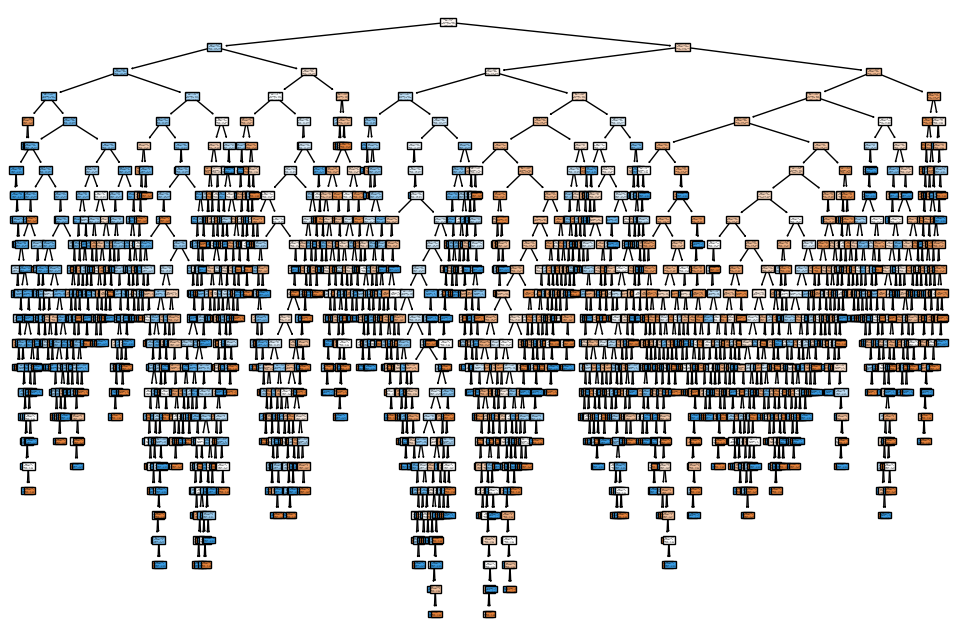

In [6]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=df.columns.to_list(), class_names=["High", "Normal"])
plt.show()

#### **Dataset with Features in DiscreteForm**

In [7]:
# Splitting the dataset
attr = df_categorized.drop(columns = ['BP_Status'])  # features
target = df_categorized['BP_Status']  # target variable
# attr.head()
# target.head()
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 44, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

tree = DecisionTreeClassifier()
tree.fit(attr_train, target_train)
target_pred = tree.predict(attr_test)
print(f"Model Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(target_test, target_pred)}\n")
print(f"Classification Report:\n {classification_report(target_test, target_pred)}\n")


Model Accuracy: 0.607115821347464
Confusion Matrix:
 [[493 187]
 [332 309]]

Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.72      0.66       680
      Normal       0.62      0.48      0.54       641

    accuracy                           0.61      1321
   macro avg       0.61      0.60      0.60      1321
weighted avg       0.61      0.61      0.60      1321




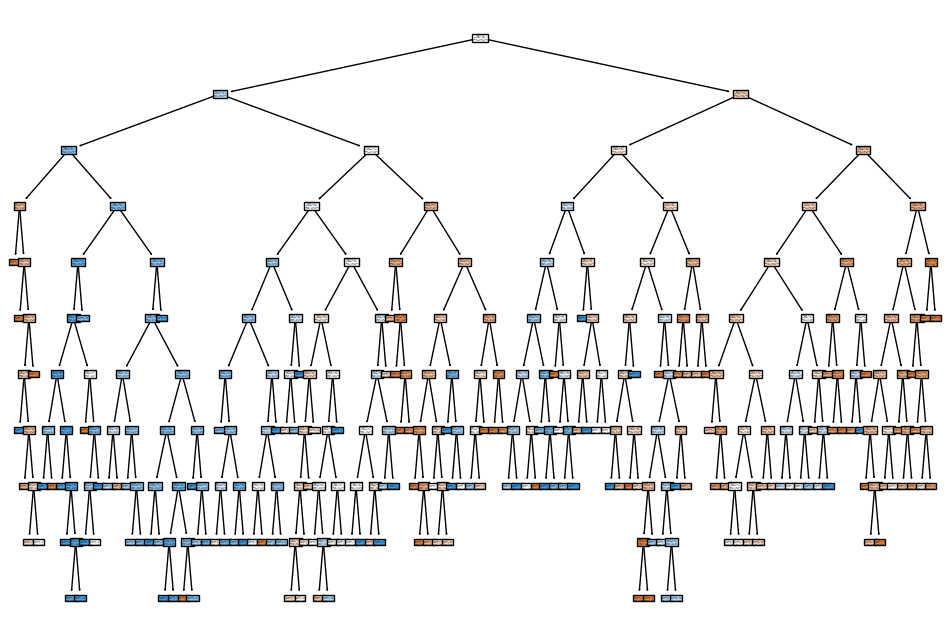

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=df_categorized.columns.to_list(), class_names=["High", "Normal"])
plt.show()